# Основные концепции Machine Learning. Домашняя работа

In [210]:
### Тут нужно сделать импорты всех необходимых библиотек ###

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rc("font", size=18)

In [211]:
### Здесь требуется загрузить датасет phones.csv ###
phones = pd.read_csv("1.8_phones.csv", sep=",")
phones.head(5)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


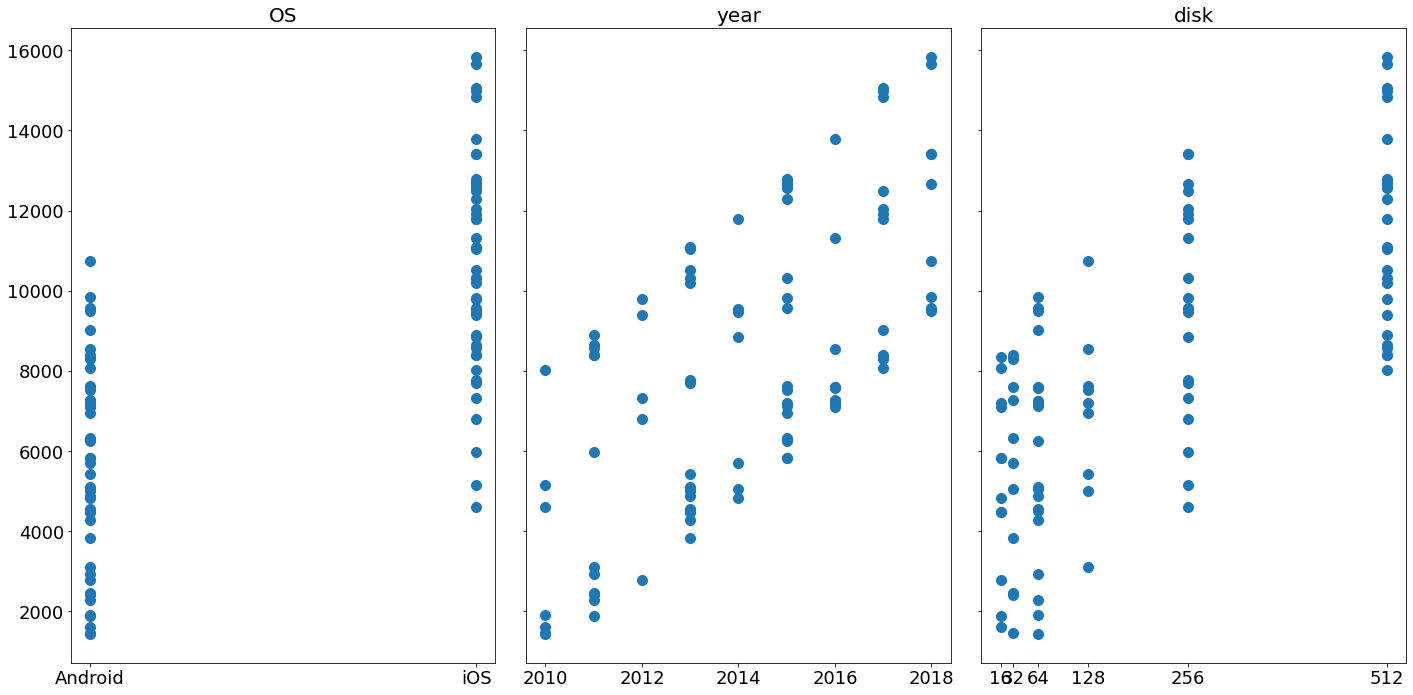

In [212]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
f,ax=plt.subplots(1, 3, sharey=True, figsize=(20,10))

ax[0].scatter(phones['os'], phones['price'], s=100)
ax[1].scatter(phones['year'], phones['price'], s=100)
ax[2].scatter(phones['disk'], phones['price'], s=100)

ax[0].set_title("OS", fontsize=20)
ax[1].set_title("year", fontsize=20)
ax[2].set_title("disk", fontsize=20)

ax[2].set_xticks([16,32,64,128,256,512])

plt.tight_layout()
plt.show()

Задание 1: обучить модель регрессии

In [213]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
phones['os_id'] = phones['os'].apply(lambda x: 1 if x == 'Android' else 0)

X = phones[['year', 'os_id', 'disk']]
y = phones['price']

In [214]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
reg = LinearRegression().fit(X,y)

In [215]:
print('2016 android 32gb - ' , reg.predict([[2016, 1, 32]])[0])
print('2016 iOS 32gb - ' , reg.predict([[2016, 0, 32]])[0])
print('2021 android 512gb - ' , reg.predict([[2021, 1, 512]])[0])
print('2021 iOS 512gb - ' , reg.predict([[2021, 0, 512]])[0])

2016 android 32gb -  7332.18987636012
2016 iOS 32gb -  8732.2648870931
2021 android 512gb -  17378.81005907408
2021 iOS 512gb -  18778.88506980706


Задание 2: обучить модель классификации

In [216]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['price', 'year']]
y = phones['os']

In [217]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 7660.50
|   |--- feature_1 <= 2012.50
|   |   |--- feature_0 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_0 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_1 >  2012.50
|   |   |--- class: Android
|--- feature_0 >  7660.50
|   |--- feature_1 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_1 >  2015.50
|   |   |--- feature_0 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_0 >  11017.00
|   |   |   |--- class: iOS



In [218]:
for i in [np.random.randint(0, 100) for _ in range(5)] :
    print(X[i:i+1],' predict - ', cl.predict(X[i:i+1])[0], ' | real - ', y[i] )

    price  year
73   8392  2011  predict -  iOS  | real -  iOS
    price  year
21   5055  2013  predict -  Android  | real -  Android
    price  year
24   9022  2017  predict -  Android  | real -  Android
    price  year
51   7761  2013  predict -  iOS  | real -  iOS
   price  year
2   1916  2010  predict -  Android  | real -  Android


Задание 3: обучить модель кластеризации

In [219]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['year', 'disk', 'price']]

In [220]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
clusters = KMeans(n_clusters=phones.os.nunique()).fit(X)

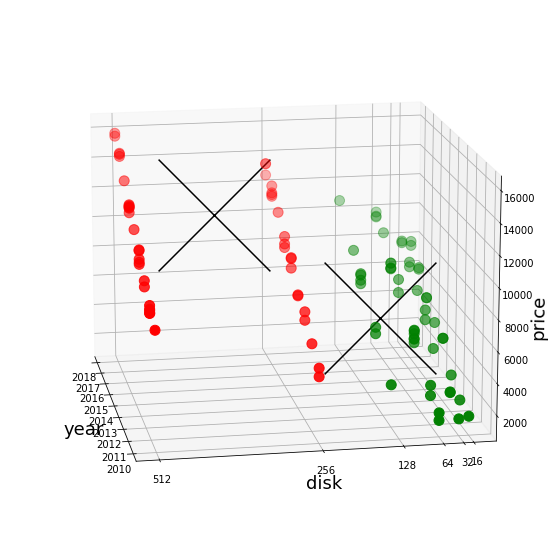

In [221]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')

# для наглядности отметим виды ОС разными цветами
colors = {'Android':'green', 'iOS':'red'}
for item in colors.keys():
    df = phones[phones.os == item]
    ax.scatter(df.year, df.disk, df.price, s=100, color=colors[item])

# обозначаем центры кластеров
for cl in clusters.cluster_centers_:
    ax.scatter(cl[0], cl[1], cl[2], s=250 * 0.5e2, marker='x', color='black')

ax.set_xlabel("year")
ax.set_ylabel("disk")
ax.set_zlabel("price")
ax.set_yticks([16,32,64,128,256,512])
ax.tick_params(labelsize=10)
# поворачиваем график, чтобы лучше увидеть скопления в районе центров кластеров
ax.view_init(15, 170)
plt.show()